Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

# Project Description
## Background and Context

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry

## Objective

The main objective consists in listening to or catching how customers feel about the product/service on Twitter to allow the companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

## Data Description

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service", among others). This is a real important analysis to generate valuables insights to improve the service, the customer relationship management, and gain some advantages againts ours competitors.

## Data Dictionary

* tweet_id: Unique ID for the tweets
* airline_sentiment   : the three categories of sentiment Negative, Neutral, Positive 
* airline_sentiment_confidence : A numeric value from 0 to 1.  
* negativereason: customer’s reasons to evaluate negatively the service    
* negativereason_confidence: numeric values from 0 to 1 measuring the negative reason confidence  
* airline: The companies involved in the analysis     
* airline_sentiment_gold :
* name: clients user name.
* negativereason_gold:
* retweet_count: how many times the tweet has been retweet.
* text: text written through the tweet 
* tweet_coord: geolocation by the time the tweet was posted
* tweet_created: Creation's date of the tweet 
* tweet_location: Country/City
* user_timezone: timezone

## **Importing the libraries**

In [215]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit
pd.options.display.float_format = '{:.2f}'.format   # changing the scientific notation

nltk.download('stopwords')                          #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #importing Stopwords corpus
from nltk.stem import PorterStemmer                 #importing Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

#!pip install vaderSentiment    # Install vader sentiment package
# !pip install textblob   # Install textblob package

# install and import necessary libraries.

# !pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score 
from collections import Counter                                           # count the key-value pairs in an object
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igorm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igorm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Loading the dataset**

In [2]:
#Loding the dataset
tweets=pd.read_csv(r"C:\Users\igorm\OneDrive\Desktop\CAREER_DS_BIG DATA\UNIVERSITY OF TEXAS DS_BA\AI & DEEP LEARNING PROGRAM\INTRODUCTION TO NLP\DATA FILES\Tweets.csv")                             #Importing the data

In [3]:
#Visualiazing the first 5 rows of the dataset
tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
#Visiualizing the last 5 rows of the dataset
tweets.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.35,NaN,0.00,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.00,Customer Service Issue,1.00,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.00,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.00,Customer Service Issue,0.67,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.68,NaN,0.00,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
#Creating a random sample of 10 records from the dataset to visualize it
tweets.sample(n=10, random_state=6)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
332,568604690767872000,positive,1.00,NaN,NaN,Virgin America,NaN,imacsweb,NaN,0,@VirginAmerica thanks for taking care of @Suup...,NaN,2015-02-19 18:54:57 -0800,At an airport near you....,Pacific Time (US & Canada)
3211,568593365601820672,neutral,0.68,NaN,NaN,United,NaN,viahailey,NaN,0,@united your flights are really cheap what's t...,"[38.21327338, -85.76378195]",2015-02-19 18:09:56 -0800,"Louisville, KY.",NaN
606,570252986372329472,negative,1.00,Bad Flight,1.00,United,NaN,PFlandersdc,NaN,0,@united #worst2unitedflightsever UA 236 LAS to...,NaN,2015-02-24 08:04:41 -0800,NaN,NaN
9251,570022626724220928,negative,1.00,Flight Attendant Complaints,0.38,US Airways,NaN,BradleyPollock,NaN,0,@USAirways I have better Intel than she does! ...,NaN,2015-02-23 16:49:19 -0800,NaN,NaN
12745,570039635541274625,negative,1.00,Cancelled Flight,1.00,American,NaN,youroptimallife,NaN,1,@AmericanAir thanks for a Cancelled Flightled ...,NaN,2015-02-23 17:56:54 -0800,New York,NaN
327,568629385105793024,neutral,0.67,NaN,0.00,Virgin America,NaN,SSal,NaN,0,@VirginAmerica help. I was On Flight 27 from...,NaN,2015-02-19 20:33:04 -0800,"Dutchess County, NY",Eastern Time (US & Canada)
13681,569752206343348224,negative,1.00,Customer Service Issue,1.00,American,NaN,jameslardizzone,NaN,0,@AmericanAir why arent callings going thru it ...,NaN,2015-02-22 22:54:46 -0800,NaN,Eastern Time (US & Canada)
6791,570267929322921985,neutral,1.00,NaN,NaN,Delta,NaN,terrybrokebad,NaN,0,"More like BaeJet Airways, amirite?\n\n“@JetBlu...",NaN,2015-02-24 09:04:04 -0800,"Newcastle, Uk",Casablanca
4993,569566673235271680,negative,1.00,Customer Service Issue,0.70,Southwest,NaN,mightymolar,NaN,0,@SouthwestAir waiting over a half hour for my ...,"[38.84884095, -77.04207298]",2015-02-22 10:37:31 -0800,"Rockville, Maryland",Eastern Time (US & Canada)
14313,569636447956930561,negative,1.00,Customer Service Issue,0.64,American,NaN,chuneke,NaN,0,"@AmericanAir @SeguineJ AA - this is a joke, ri...",NaN,2015-02-22 15:14:47 -0800,"Nicosia, Cyprus",Athens


In [6]:
#Obtaining the shape of the datset
tweets.shape

(14640, 15)

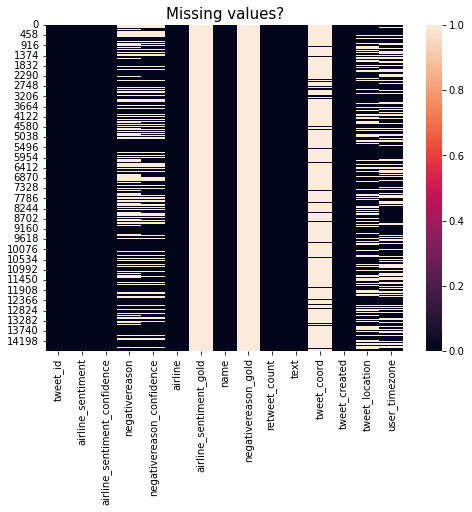

In [7]:
#Heatmap with the missing value Visualization
plt.figure(figsize=(8,6))
sns.heatmap(tweets.isnull())                                 
plt.title("Missing values?", fontsize = 15)
plt.show()

In [8]:
#Checking the data types of the columns in the dataset and the Non-Null values
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
#Checking the unique values per colummns within the dataset
tweets.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [10]:
#checking for duplicate values
tweets.duplicated().value_counts()

False    14604
True        36
dtype: int64

In [11]:
#Summarizing the null values per column
tweets.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#### Observations:
* Having this approach and obtaining information about the dataset give us an idea about the strategy to identify and handle the missing values or any other issue within the dataset.
* The dataset has 15 columns and 14640 rows.
* There are a total of 14640 non-null observations in all the columns "Tweetid", "airline_sentiment", "airline_sentiment_confidence", "airline", "name", "retweet_count", "text", "tweet_created" so we have not missing values values in these columns.
* The columns of the dataset are as follow: "tweet_id", "airline_sentiment", "airline_sentiment_confidence", "negativereason", "negativereason_confidence", "airline", "airline_sentiment_gold", "name", "negativereason_gold ", "retweet_count", "text", "tweet_coord ", "tweet_created", "tweet_location", and "user_timezone".
* The dataset contains 15 columns: 11 are object type('airline_sentiment, 'negativereason', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone', 2 corresponds to an integer64 type ('tweetid' and 'retweet_count'), and 2 correspond to float64 format('airline_sentiment_confidence' and 'negativereason_confidence').
* The total memory usage is approximately 1.7+ MB 
* We have 36 duplicated values in our dataset.
* We have a great percentage of null values in our dataset, including almost the 100% of the data in the columns 'airline_sentiment_gold', 'negativereason_gold', and 'tweet_coord'.
* Having a look on the first 10 rows of the dataset, the last 10, and extracting a 20 rows random sample, we can observe that we have to do some data cleansing process.

In [12]:
#Visualizing the statistical metrics per numeric variable
tweets.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.00,569218351767382528.00,779111158481836.75,567588278875213824.00,568559178101439488.00,569477857923110912.00,569890473289000960.00,570310600460525568.00
airline_sentiment_confidence,14640.00,0.90,0.16,0.34,0.69,1.00,1.00,1.00
negativereason_confidence,10522.00,0.64,0.33,0.00,0.36,0.67,1.00,1.00
retweet_count,14640.00,0.08,0.75,0.00,0.00,0.00,0.00,44.00


#### Observations:
* Lets have a look on the statistical values of the variables.
  * tweetid: in this case is not relevant. 
  * airline_sentiment_confidence: the mean is 0.90 , the airline_sentiment_confidence is between 0.34 and 1, with a standard deviation of 0.16. The 75% of the data is over 0.69 meanwhile the 25% of the data is 1.
  * negativereason_confidence: the mean is 0.64, the values are between 0 and 1 in this dataset with a standard deviation of 0.33 years. The 75% of the data is over 0.36 meanwhile the 25% of the data is 1. 
  * retweet_count: the mean is 0.08, the  values are between 0 and 44 in this dataset with a standard deviation of 0.75. The 75% of the data is over 0 meanwhile the 25% of the data is over 0.

In [13]:
#Printing the percental weights of the Null and NA values within the dataset
NA_NULL_Percentage = ((tweets.isnull() | tweets.isna()).sum() * 100 / tweets.index.size).round(2)
print("Percental weights of the Null & NA values per column within the dataset")
print(NA_NULL_Percentage)

Percental weights of the Null & NA values per column within the dataset
tweet_id                        0.00
airline_sentiment               0.00
airline_sentiment_confidence    0.00
negativereason                 37.31
negativereason_confidence      28.13
airline                         0.00
airline_sentiment_gold         99.73
name                            0.00
negativereason_gold            99.78
retweet_count                   0.00
text                            0.00
tweet_coord                    93.04
tweet_created                   0.00
tweet_location                 32.33
user_timezone                  32.92
dtype: float64


In [14]:
#Function to obtain the number of zero, missing values, percentage  weights, Totals & data type.
#Taken for the Trump tweet analysis project
def missing_zero_values_table(df):
        zero_val = (tweets == 0.00).astype(int).sum(axis=0)                                            # Nu of zero in each column
        mis_val = tweets.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * tweets.isnull().sum() / len(tweets)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(tweets) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = tweets.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(tweets.shape[1]) + " columns and " + str(tweets.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(tweets)

Your selected dataframe has 15 columns and 14640 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
negativereason_gold,0,14608,99.80,14608,99.80,object
airline_sentiment_gold,0,14600,99.70,14600,99.70,object
tweet_coord,0,13621,93.00,13621,93.00,object
negativereason,0,5462,37.30,5462,37.30,object
user_timezone,0,4820,32.90,4820,32.90,object
tweet_location,0,4733,32.30,4733,32.30,object
negativereason_confidence,1344,4118,28.10,5462,37.30,float64


#### Observations:
* Percental weights for the null values per column.
  * airline_sentiment_gold: this column has a 99.73% of Null values/NaN. 
  * negativereason_gold: this column has a 99.78% of Null values/NaN.
  * tweet_coord: the null values in this column represents the 93.04%.
  * negativereason: null values represents the 37.31%.
  * user_timezone: null values represents 32.92%.
  * tweet_location: this column has a 32.33% of null values/NaN.
  * negativereason_confidence: null values represents 28.13% in this column.

In [15]:
#Changing the format for the 'tweet_created' column from object to date format
tweets['tweet_created'] = pd.to_datetime(tweets['tweet_created']).dt.date
tweets['tweet_created'] = pd.to_datetime(tweets['tweet_created'])

In [16]:
#Validating the changes from object to datetime format
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [17]:
#Validating the change in the "tweet_created" column
tweets.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)


In [18]:
# Creating a working copy to avoid affecting the original dataset
tweets_1 = tweets.copy()

In [19]:
#Validating the copy of the dataset
tweets_1.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada)


In [20]:
#Dropping the columns which have got too many missing values or does not relevent information
tweets_1.drop(['tweet_coord', 'airline_sentiment_gold','negativereason_gold'],axis=1,inplace=True)
tweets_1.shape

(14640, 12)

In [21]:
#Validating the dropping of the columns 'tweet_coord', 'airline_sentiment_gold', 'negativereason_gold'
tweets_1.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)


In [22]:
#Converting the 'negativereason' column from object to category
tweets_1['negativereason'] = tweets_1.negativereason.astype('category')

In [23]:
#Converting the 'airline_sentiment' & 'airline' columns from object to category
tweets_1['airline_sentiment'] = tweets_1.airline_sentiment.astype('category')
tweets_1['airline'] = tweets_1.airline.astype('category')

In [24]:
#Validating the change from object to category type for the 'negativereason' column
tweets_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  category      
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   category      
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  category      
 6   name                          14640 non-null  object        
 7   retweet_count                 14640 non-null  int64         
 8   text                          14640 non-null  object        
 9   tweet_created                 14640 non-null  datetime64[ns]
 10  tweet_location                9907 non-null   object        
 11  user_timezone               

In [25]:
# Replacing NaN with Unknown values in the 'negativereason' column
tweets_1['negativereason'] = tweets_1['negativereason'].cat.add_categories('Unknown')
tweets_1['negativereason'].fillna('Unknown', inplace =True) 

In [26]:
#Validating the changes in the 'negativereason' column
tweets_1.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,Unknown,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,Unknown,0.00,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,Unknown,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [27]:
#Counting the different negative reason provided and checking the changes with the new 'Unknown' category
Neg_reason_count = tweets_1.groupby('negativereason').size()
Neg_reason_count

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
Unknown                        5462
dtype: int64

In [28]:
#Filling the NaN values with the median in the 'negativereason_confidence' column
tweets_1['negativereason_confidence'].fillna(value=tweets_1['negativereason_confidence'].median(), inplace=True)

In [31]:
#Validating the changes in the 'negativereason_confidence' column
tweets_1.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,Unknown,0.67,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,Unknown,0.00,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,Unknown,0.67,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


#### Observations:
* Initially we made some changes to our dataset, in order to improve the performance of the study. These are some of the remarkables changes:
  * We dropped 3 columns due to the great percental weight of the Null/NaN values('tweet_coord'(93.04%), 'airline_sentiment_gold'(99.73%), 'negativereason_gold'(99.78%)). 
  * We converted from object to category the columns 'airline_sentiment' and 'negativereason'.
  * We filled the NaN values in the 'negativereason_confidence' column with the median.
  * In the 'Negativereason' column we filled the NaN values with the term 'Unknown'.
  * After changing from object to category type the memory use decreased from 1.7+MB to 1.0+MB.

## **Exploration Data Analysis (EDA)**

In [32]:
#Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    mean = data[feature].mean()
    median = data[feature].median()
    mode = data[feature].mode()
    mode_count = data[feature].mode().count()

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="seismic"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    # Adding the mean to the histogram
    ax_hist2.axvline(mean, color="green", linestyle="--")
    # Adding the median to the histogram
    ax_hist2.axvline(median, color="black", linestyle="-")
    # Adding the 6 modes to the histogram
    ax_hist2.axvline(mode[0], color="red", linestyle="-", label="Mode1")
    ax_hist2.axvline(mode[1], color="red", linestyle="-", label="Mode1")
    ax_hist2.axvline(mode[2], color="red", linestyle="-", label="Mode1")
    ax_hist2.axvline(mode[3], color="red", linestyle="-", label="Mode1")
    # Adding the mean of the 6 modes to the histogram
    ax_hist2.axvline(mode.mean(), color="purple", linestyle="-")

In [33]:
#Function to create the labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="gist_ncar",
        order=data[feature].value_counts().index[:n].sort_values(ascending=True),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=16,
            xytext=(1, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  #show the plot

In [34]:
# Functions to plot the boxplots
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [35]:
#Printing the oldest and the newest date of the tweets
print('the oldest tweet in this dataset is was created in:' , tweets_1['tweet_created'].min())
print('the newest tweet in this dataset is was created in:' , tweets_1['tweet_created'].max())
#Validatin the uniques values in the 'tweet_created' column
print('The uniques values for the date when the tweets was created are:' , tweets_1['tweet_created'].nunique(), 'different dates')

the oldest tweet in this dataset is was created in: 2015-02-16 00:00:00
the newest tweet in this dataset is was created in: 2015-02-24 00:00:00
The uniques values for the date when the tweets was created are: 9 different dates


In [38]:
#Tweets per date of post
tweets_created_by_date = tweets_1.groupby('tweet_created').size()
tweets_created_by_date

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

#### Observations:
* the largest number of tweets were created in two days. Between 2015-02-22 and 2015-02-23, with more than 6,000 tweets in that time frame.
* We would have to find out if any anomalous event happened between that time period to correlate this peak and design a containment plan for events of similar origin in the future.

In [39]:
#Printing the unique values per category type columns
for i in tweets_1.describe(include=["category"]).columns:
    print("Unique values in", i, "are :")
    print(tweets_1[i].value_counts())
    print("*" * 50)

Unique values in airline_sentiment are :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
**************************************************
Unique values in negativereason are :
Unknown                        5462
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64
**************************************************
Unique values in airline are :
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
**************************************************


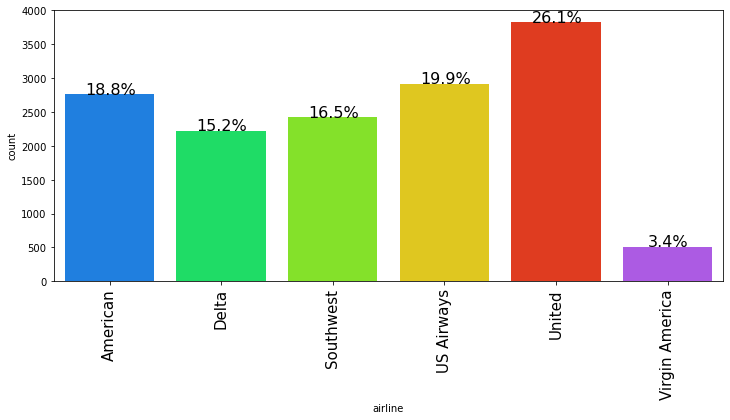

In [40]:
labeled_barplot(tweets_1, "airline", perc=True, n=11)

#### Observations:
* 26.1% of the tweets in this dataset are related to the United Airlines company, thus occupying the first place in number of tweets with 3822 samples out 14460.
* The second place corresponds to the US Airways company, representing 19.9% with a total of 2913 samples out 14460.
* The third place corresponds to the American Airlines, representing 18.8% within the sample with a total of 2759 samples out 14460.
* The fourth place corresponds to the Southwest Airline company, representing the 16.5% within the sample with a total of 2420 samples out 14460.
* The fifth place corresponds to Delta Airline, representing 15.2% within the sample with a total of 2222 samples out 14460.
* The Virgin America Airline company is in the sixth place within this dataset, representing a 3.4% with a total of 504 samples out 14460.

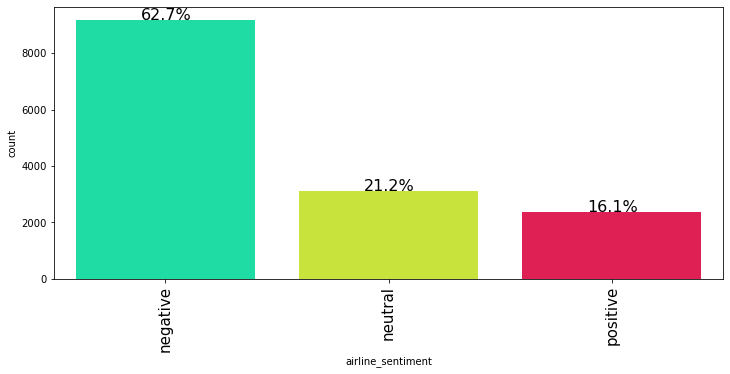

In [41]:
labeled_barplot(tweets_1, "airline_sentiment", perc=True, n=11)

#### Observations:
* The Negatives tweets domains evidently the dataset with a 62.7% with 9178 samples out 14460.
* The Neutral tweets represents the 21.2% with 3099 samples out 14460.
* The Positive tweets are a minority representing just the 16.1% within the dataset with a total of 2363 samples out 14460.

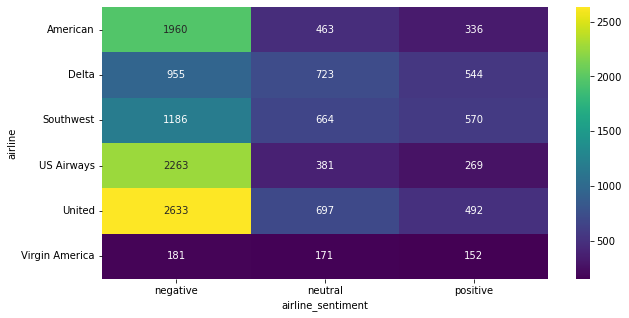

In [42]:
# Creating a heatmap for the crosstab between airline and airline_seniment
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(tweets_1["airline"], tweets_1["airline_sentiment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("airline")
plt.xlabel("airline_sentiment")
plt.show()

#### Observations:
* United Airlines has the highest number of negative tweets with 2633, 697 neutral tweets and 492 positive tweets.
* US Airways Airlines has the second highest number of negative tweets with 2263, with 381 neutral tweets and 269 positive tweets.
* American Airlines has the third highest number of negative tweets with 1960, with 463 neutral tweets and 336 positive tweets.
* Southwest Airlines has the fouth highest number of negative tweets with 1186, with 664 neutral tweets and 570 positive tweets.
* Delta Airlines has the fifth highest number of negative tweets with 955, with 723 neutral tweets and 544 positive tweets.
* Virgin American Airlines has the sixth highest number of negative tweets with 181, with 171 neutral tweets and 152 positive tweets.

The total number of tweets per each airline correspons as follows: 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


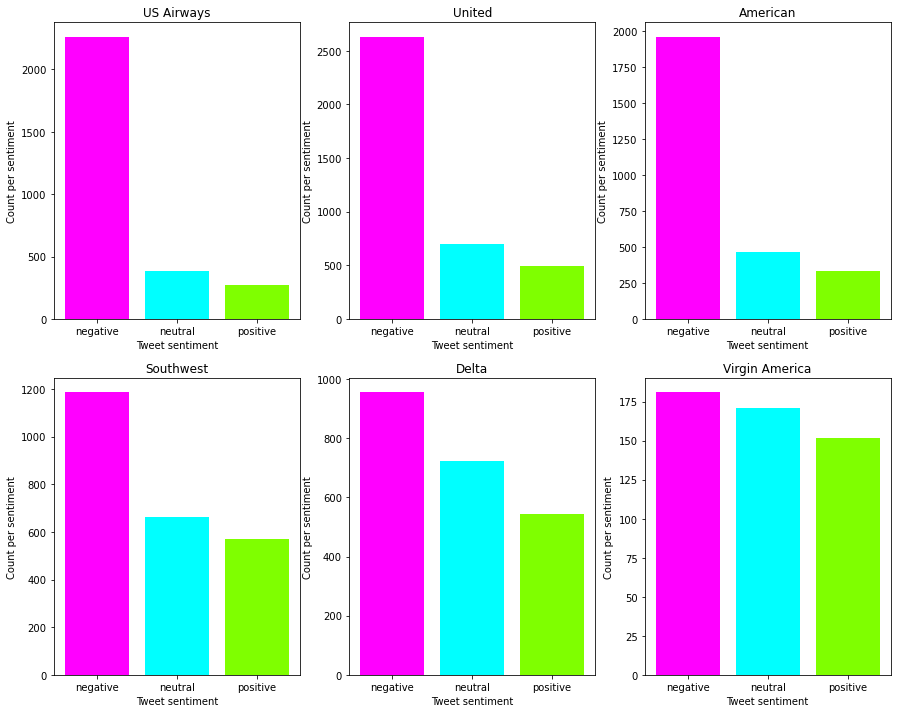

In [43]:
# Creating a function to Plot the number of tweet according to the mood per each company
plt.figure(1,figsize=(15, 12))
Airl = ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in Airl:
    indices= Airl.index(i)
    plt.subplot(2,3,indices+1)
    data_new =tweets_1[tweets_1['airline']==i]
    count=data_new['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['magenta', 'cyan', 'chartreuse'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Count per sentiment')
    plt.xlabel('Tweet sentiment')
    plt.title(''+i)
    
print("The total number of tweets per each airline correspons as follows: \n ", tweets_1.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

#### Observations:
* The negatives tweets are domaining the dataset as we can see from the graphs.
* US Airways, United, and American Airlines have a poor ration between the Negatives, Neutrals and the Positive tweets. The mean of the sum of the neutrals and positive are under the 40% aproximately.
* Southwest and Delta have a moderate ratio between the Negatives, Neutrals and Positives tweets. The mean of the sum of neutrals and positive tweets equals or slightly exceeds the negatives tweets.
* Virgina America Airlines has the best ratio between the Negatives, Neutrals and Positives tweets. The number of the tweets belonging to each category are very close. The average of the sum of neutral and positive tweets markedly exceeds the negative ones. However, we must also take into account that it is the one with the fewest samples of the entire dataset.

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


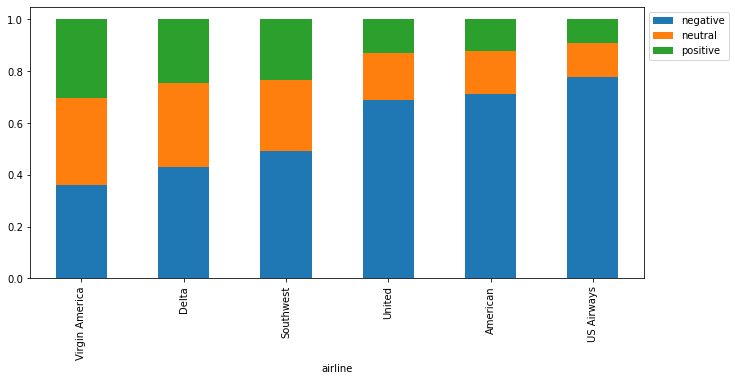

In [44]:
# Creating a stacked barplot for the relationship between airline and airline_sentiment variables
stacked_barplot(
    tweets_1, "airline", "airline_sentiment")

#### Observations:
* In this graph we can also validate what is described in the previous graph, with respect to the relationships of the categories of tweets for each company.
* Poor ratio companies: US Airways, American, and United Airlines
* Moderate ratio: Delta and Southwest
* Good Ratio: Virgin America
* Highest number of samples within the dataset: United Airlines
* Lowest number of samples within the dataset: Virgin America
* Highest number of Negative Tweets: US Airways
* Lowest number of Negative Tweets: Virgin America
* Highest number of Neutrals Tweets: Delta Airlines
* Lowest number of Neutrals Tweets: Virgin America Airlines
* Highest number of Positive Tweets: Southwest Airlines
* Lowest number of Positive Tweets: Virgin America Airlines

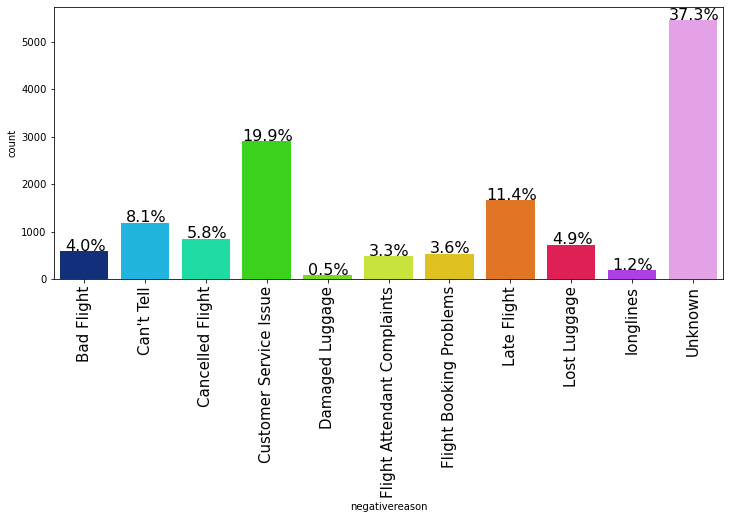

In [45]:
#Plotting the percental weight of the negative reasons in general
labeled_barplot(tweets_1, "negativereason", perc=True, n=11)

#### Observations:
* After changing the NaN values in the datatset to 'Unknown', we can observe that it represents the 37.3% within this dataset.
* The second negative reason reported by the clients is a 'Customer sevice Issue' with the 19.9%.
* With a 11.4%, the third negative reason reported is 'Late Flight'.
* The fourth negative reason corresponds to 'Can't Tell' neative reason with the 8.1%.
* The fifth negative reason reported by the clients was 'Cancelled flight' with the 5.8%.
* The sixth negative reason reported by the clients was 'Lost Luggage' with the 4.9%.
* With a 4.0%, the seventh negative reason reported is 'Bad Flight'.
* With a 3.6%, the eighth negative reason reported is 'Flight Booking Problems'.
* The nineth negative reason reported by the clients was 'Flight Attendant Complaints' with the 3.3%.
* The tenth negative reason reported by the clients was 'Longlines' with the 1.2%.
* With a 0.5%, the eleventh negative reason reported is 'Damaged Luggage'.
* As we can see the 'Unknown' reason represents an important part of the dataset with almost 40% so in this regarding we should find a mechanism to make the clients provide a real reason. Maybe, we should create a reward program when the fill polls. Furthermore, we should validate if it is not a problem with the dataset.

In [46]:
# Negative reason reported by company
tweets_1.groupby('airline')['negativereason'].value_counts(ascending=True)

airline                                    
American        Damaged Luggage                 12
                longlines                       34
                Bad Flight                      87
                Flight Attendant Complaints     87
                Flight Booking Problems        130
                                              ... 
Virgin America  Bad Flight                      19
                Can't Tell                      22
                Flight Booking Problems         28
                Customer Service Issue          60
                Unknown                        323
Name: negativereason, Length: 66, dtype: int64

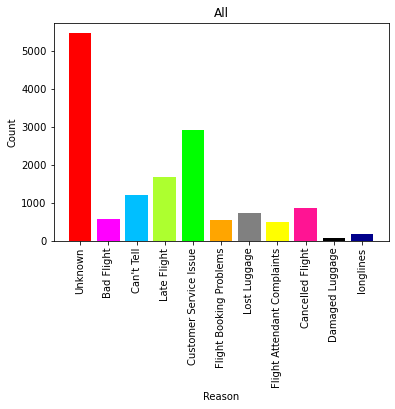

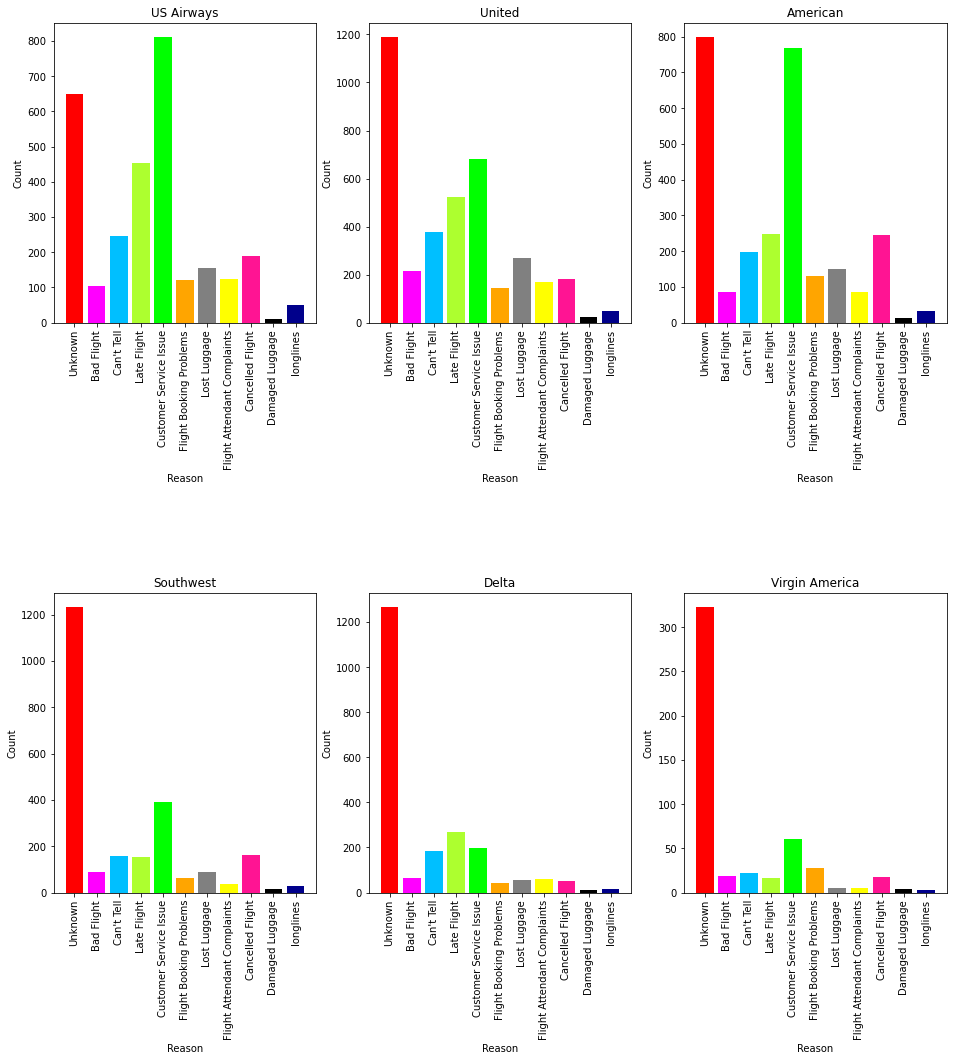

In [47]:
#Creating a function to plot the number of negative reasons per company
#Taken, adapted and modified from Kaggle
tweets_1['negativereason'].nunique()
neg_rea=dict(tweets_1['negativereason'].value_counts(sort=False))
def neg_reas(Airline):
    if Airline=='All':
        a=tweets_1
    else:
        a=tweets_1[tweets_1['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(tweets_1['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    a=neg_reas(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','magenta','deepskyblue','greenyellow','lime','orange','gray','yellow','deeppink','black','darkblue'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title(''+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(16, 16))
for i in Airl:
    indices= Airl.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

#### Observations:
* 'Unknown', 'Customer Service Issue', 'Late Flight', 'Can't Tell', and 'Cancelled Flight'represents the major issues for US Airways, United and American Airlines.
* Even though, 'Unknown', 'Customer Service Issue', 'Late Flight', 'Can't Tell', and 'Cancelled Flight'represents as well the major issues for Southwest, Delta and Virgin America, The number is notably lower and the distribution between each of the reported negative reasons is more homogeneous.
* The company with the best distribution and the fewest problems is Virgin America.
* The companies that have the greatest quantity and diversity of inconveniences are US Airways, United, and American. They should check their process continuosly.

The Positive Word Median is: 86.0
The Negative Word Median is: 126.0


Text(0.5, 0.98, 'Characters in message')

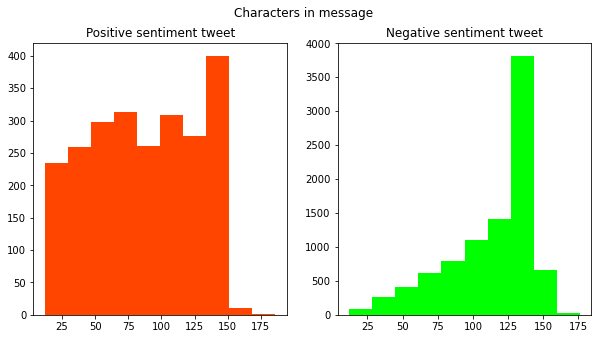

In [48]:
#Number of characters per tweets
#Taken and adapted from Trump sentiment analysis projec
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = tweets_1[tweets_1['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='orangered')
ax1.set_title('Positive sentiment tweet')
print("The Positive Word Median is:", tweet_len.median())
tweet_len = tweets_1[tweets_1['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(tweet_len,color='lime')
ax2.set_title('Negative sentiment tweet')
print("The Negative Word Median is:", tweet_len.median())
fig.suptitle('Characters in message')

#### Observations:
* The distribution between positive tweets from 15 to 130 characters is fairly even. However, there is a clear increase in positive tweets from around 130 characters to around 150, where they drop off noticeably.
* For negative tweets, the distribution has a left skewness with the highest number of characters between approximately 100 and 140 characters, with an obvious anomaly between approximately 125 and 140 characters.

The Positive Word Median is: 14.0
The Negative Word Median is: 21.0


Text(0.5, 0.98, 'Words in a tweet')

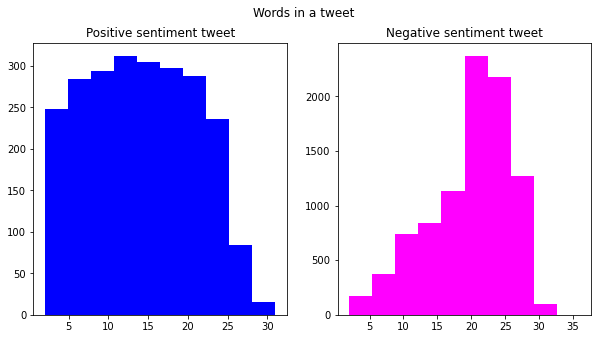

In [49]:
#Number of words per tweets
#Taken and adapted from Trump sentiment analysis project
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = tweets_1[tweets_1['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='blue')
ax1.set_title('Positive sentiment tweet')
print("The Positive Word Median is:", tweet_len.median())
tweet_len = tweets_1[tweets_1['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='magenta')
ax2.set_title('Negative sentiment tweet')
print("The Negative Word Median is:", tweet_len.median())
fig.suptitle('Words in a tweet')

#### Observations:
* The distribution between positive tweets from 1 to 25 words is fairly even. There is not an anomalous behavior. After 25 words the drop off noticeably.
* For negative tweets, the distribution has a kind of left skewness with the highest number of words between approximately 20 and 27 words. 

In [50]:
#Importing Wordcloud
from wordcloud import WordCloud,STOPWORDS

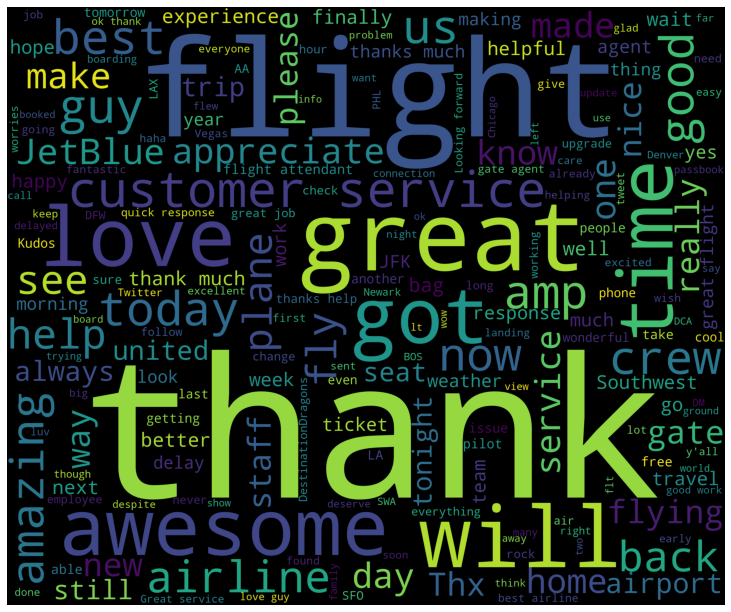

In [51]:
#Plotting the workcloud for positive reasons
#Taken from the trump sentiment analysis project
data_new=tweets_1[tweets_1['airline_sentiment']=='positive']
words = ' '.join(data_new['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 11))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observations:
* Among the positive words that stand out the most before preprocessing are: Thank, Awesone, Aamazing, Love, Great, Customer Service, Help.

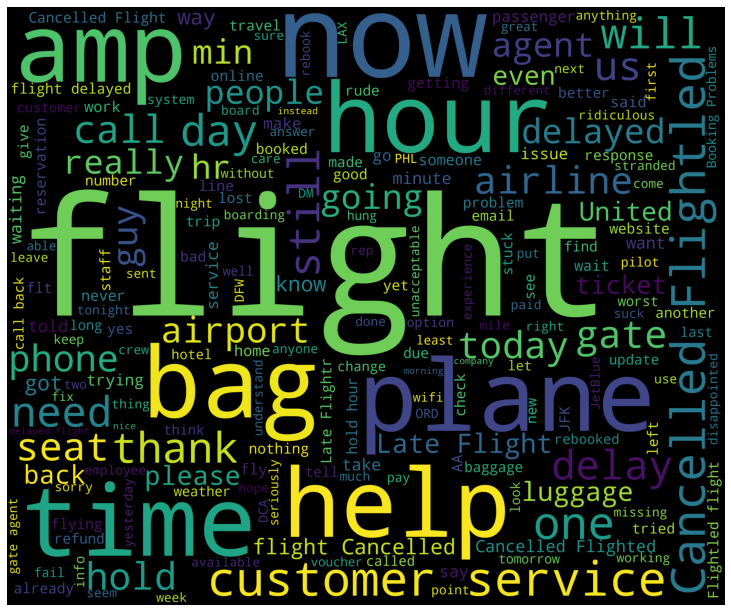

In [52]:
#Plotting the workcloud for negative reasons
#Taken from the trump sentiment analysis project
data_new_neg=tweets_1[tweets_1['airline_sentiment']=='negative']
words = ' '.join(data_new_neg['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 11))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observations:
* Among the negatives words that stand out the most before preprocessing are: Cancelled Flightled, Late Flight, Delayed, Call Ticket, Help, among others.

## Data Preprocessing

In [170]:
#Generating a copy of the dataset tweets_1 called tweets_2 to protect the data
tweets_2 = tweets_1.copy()

In [171]:
#Dropping the samples with sentiment = neutral in the dataset tweets_2
tweets_2.drop(tweets_2.loc[tweets_2['airline_sentiment']=='neutral'].index, inplace=True)

In [172]:
#Validating the changes in the dataset tweets_2
tweets_2.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.35,Unknown,0.00,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.00,Can't Tell,0.68,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.67,Unknown,0.00,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada)


In [173]:
#Copy of tweets_2 called tweets_enc
tweets_enc = tweets_2.copy()

In [174]:
#Validating the copy of tweets_2
tweets_enc.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.35,Unknown,0.00,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)


In [175]:
#Using the labelencoder for the airline sentiment variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(tweets_enc['airline_sentiment'])

tweets_enc['airline_sentiment_enc'] = le.transform(tweets_enc['airline_sentiment'])
tweets_enc.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_enc
1,570301130888122368,positive,0.35,Unknown,0.00,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),1
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),0
5,570300767074181121,negative,1.00,Can't Tell,0.68,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),0
6,570300616901320704,positive,0.67,Unknown,0.00,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),1


In [176]:
tweets_enc['airline_sentiment_enc'].value_counts()

0    9178
1    2363
Name: airline_sentiment_enc, dtype: int64

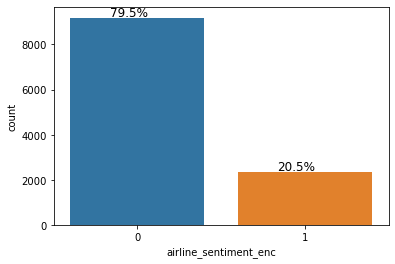

In [177]:
#plot the distribution of the class label
def bar_plot(tweets_enc, feature):
    plot = sns.countplot(x =feature, data = tweets_enc)
    total = len(tweets_2)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")
    plt.show()
    
bar_plot(tweets_enc,'airline_sentiment_enc')

#### Observations:
* The Negative class dominate the sample with 79.5% while the positive class represents a 20.5% within the dataset.

In [178]:
#Dropping the columns that we are not going to use in dataset tweets_2
#In this case we are keeping the column 'airline_sentiment_encoded' if we want to work with NON-PARAMETRIC algorithms
tweets_2.drop(['tweet_id', 'airline_sentiment_confidence','negativereason', 'negativereason_confidence', 'airline', 'name', 'retweet_count', 'tweet_created', 'tweet_location', 'user_timezone'],axis=1,inplace=True)
tweets_2.shape

(11541, 2)

In [179]:
#Validating the changes in the dataset
tweets_2.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [180]:
#Creating another copy(tweets_3) from the dataset tweets_2 with the columns dropped
tweets_3 = tweets_2.copy()
tweets_3.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [181]:
#Checking the encoded dataset before dropping the columns
tweets_enc.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_enc
1,570301130888122368,positive,0.35,Unknown,0.00,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),1
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),0
5,570300767074181121,negative,1.00,Can't Tell,0.68,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),0
6,570300616901320704,positive,0.67,Unknown,0.00,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),1


In [182]:
#Dropping the columns in the encoded dataset for further use
tweets_enc.drop(['tweet_id','airline_sentiment', 'airline_sentiment_confidence','negativereason', 'negativereason_confidence', 'airline', 'name', 'retweet_count', 'tweet_created', 'tweet_location', 'user_timezone'],axis=1,inplace=True)
tweets_enc.shape

(11541, 2)

In [183]:
#Validating the changes after dropping the columns in the encoded dataset
tweets_enc.head()

,text,airline_sentiment_enc
1,@VirginAmerica plus you've added commercials t...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
5,@VirginAmerica seriously would pay $30 a fligh...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",1


### Html tag removal

In [184]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()
tweets_enc['text'] = tweets_enc['text'].apply(lambda x: strip_html(x))
tweets_enc.head()

,text,airline_sentiment_enc
1,@VirginAmerica plus you've added commercials t...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
5,@VirginAmerica seriously would pay $30 a fligh...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",1


### Removing the numbers

In [185]:
#removing the numericals characters within the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', str(text))
  return text
tweets_enc['text'] = tweets_enc['text'].apply(lambda x: remove_numbers(x))
tweets_enc.head()

,text,airline_sentiment_enc
1,@VirginAmerica plus you've added commercials t...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
5,@VirginAmerica seriously would pay $ a flight ...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",1


### Tokenization

In [186]:
#Lets do the Tokenization of the dataset
tweets_enc['text'] = tweets_enc.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
tweets_enc.head()

,text,airline_sentiment_enc
1,"[@, VirginAmerica, plus, you, 've, added, comm...",1
3,"[@, VirginAmerica, it, 's, really, aggressive,...",0
4,"[@, VirginAmerica, and, it, 's, a, really, big...",0
5,"[@, VirginAmerica, seriously, would, pay, $, a...",0
6,"[@, VirginAmerica, yes, ,, nearly, every, time...",1


### Removal of Special Characters

In [187]:
#remove special characters
#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

tweets_enc['text'] = tweets_enc.apply(lambda row: remove_non_ascii(row['text']), axis=1)
tweets_enc.head()

,text,airline_sentiment_enc
1,"[@, VirginAmerica, plus, you, 've, added, comm...",1
3,"[@, VirginAmerica, it, 's, really, aggressive,...",0
4,"[@, VirginAmerica, and, it, 's, a, really, big...",0
5,"[@, VirginAmerica, seriously, would, pay, $, a...",0
6,"[@, VirginAmerica, yes, ,, nearly, every, time...",1


### Removal of Punctuations

In [188]:
#Removing the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


tweets_enc['text'] = tweets_enc.apply(lambda row: remove_punctuation(row['text']), axis=1)
tweets_enc.head()

,text,airline_sentiment_enc
1,"[VirginAmerica, plus, you, ve, added, commerci...",1
3,"[VirginAmerica, it, s, really, aggressive, to,...",0
4,"[VirginAmerica, and, it, s, a, really, big, ba...",0
5,"[VirginAmerica, seriously, would, pay, a, flig...",0
6,"[VirginAmerica, yes, nearly, every, time, I, f...",1


### e)- Removal of stopwords 

In [189]:
#Natural language processing tool-kit
import nltk                                       

nltk.download('wordnet')
nltk.download('omw-1.4')  

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords 
stopwords = stopwords.words('english')
stopwords = list(set(stopwords))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igorm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\igorm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igorm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igorm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [190]:
# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Creating an empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Appending processed words to new list.
    return new_words
tweets_enc['text'] = tweets_enc['text'].apply(lambda x: remove_stopwords(x))
tweets_enc.head(10)

,text,airline_sentiment_enc
1,"[VirginAmerica, plus, added, commercials, expe...",1
3,"[VirginAmerica, really, aggressive, blast, obn...",0
4,"[VirginAmerica, really, big, bad, thing]",0
5,"[VirginAmerica, seriously, would, pay, flight,...",0
6,"[VirginAmerica, yes, nearly, every, time, I, f...",1
8,"[virginamerica, Well, I, didntbut, NOW, I, DO, D]",1
9,"[VirginAmerica, amazing, arrived, hour, early,...",1
11,"[VirginAmerica, I, pretty, graphics, much, bet...",1
12,"[VirginAmerica, This, great, deal, Already, th...",1
13,"[VirginAmerica, virginmedia, I, flying, fabulo...",1


### f)- Conversion to lowercase

In [191]:
#Converting all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
tweets_enc['text'] = tweets_enc['text'].apply(lambda x: to_lowercase(x))
tweets_enc.head(10)

,text,airline_sentiment_enc
1,"[virginamerica, plus, added, commercials, expe...",1
3,"[virginamerica, really, aggressive, blast, obn...",0
4,"[virginamerica, really, big, bad, thing]",0
5,"[virginamerica, seriously, would, pay, flight,...",0
6,"[virginamerica, yes, nearly, every, time, i, f...",1
8,"[virginamerica, well, i, didntbut, now, i, do, d]",1
9,"[virginamerica, amazing, arrived, hour, early,...",1
11,"[virginamerica, i, pretty, graphics, much, bet...",1
12,"[virginamerica, this, great, deal, already, th...",1
13,"[virginamerica, virginmedia, i, flying, fabulo...",1


### g)- Lemmatize

In [192]:
#lemmatize the words
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
        
    # regrouping/joining all the words as str
    return ' '.join(new_words)

tweets_enc['text'] = tweets_enc['text'].apply(lambda x: lemmatize_list(x))
tweets_enc.head()

,text,airline_sentiment_enc
1,virginamerica plus add commercials experience ...,1
3,virginamerica really aggressive blast obnoxiou...,0
4,virginamerica really big bad thing,0
5,virginamerica seriously would pay flight seat ...,0
6,virginamerica yes nearly every time i fly vx e...,1


## Modeling, Cross Validation, and Evaluation

## Vectorization

### CountVectorizer

In [193]:
# Vectorization (Convert text data to numbers).
#Taken and adapted from the IMDB sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(tweets_enc['text'])

data_features = data_features.toarray()

In [194]:
#Shape of the feature vector
data_features.shape      

(11541, 500)

In [195]:
#Defining the dependent variable and the features 
X = data_features
y = tweets_enc.airline_sentiment_enc

In [196]:
#Splitting the dataset into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [197]:
#Finding the optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [199]:
#Using K-Fold Cross-validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

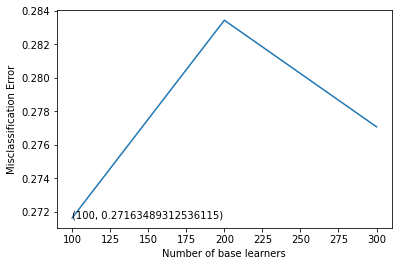

In [200]:
#Plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #the error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #the Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [201]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2461
           1       0.72      0.68      0.70       425

    accuracy                           0.91      2886
   macro avg       0.83      0.82      0.83      2886
weighted avg       0.91      0.91      0.91      2886

Accuracy of the model is :  0.9147609147609148


[[2343  118]
 [ 136  289]]


<AxesSubplot:>

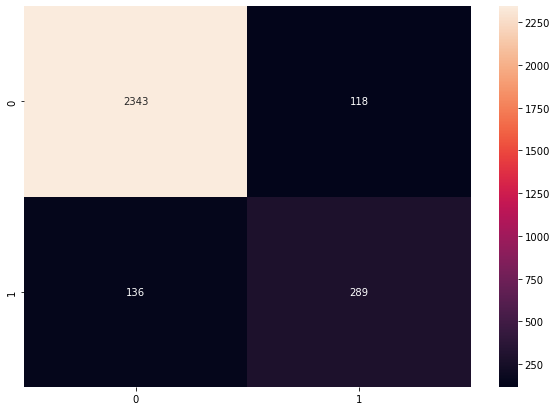

In [141]:
#Printing and plotting the Confusion matrix to evaluate the distribution of the prediction among all the classes.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observations: 
* In this iteration, with the CountVectorizer both the FN and the FP values represents the 4%.
* True Negatives represents the 81% and the True positives TP represents 10%.
* The Accuracy achieved was the 91.47%.

thank,jetblue,great,southwestair,unite,love,usairways,awesome,amaze,virginamerica,http,flight,best,nt,delay,good,appreciate,much,fly,make,get,rock,thx,hold,hours,cancel,crew,guy,airline,you,well,bag,please,wait,see,hour,like,help,service,customer,
 
 


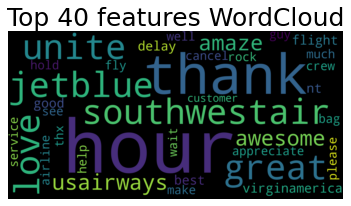

In [217]:
#Taken from the IMDB Sentiment analysis project
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(25, 18), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=25)
plt.axis("off")
plt.show()

#### Observations: 
* The 40 words most important after processing with the CountVectorizer are: thank,jetblue,great,southwestair,unite,love,usairways,awesome,amaze,virginamerica,http,flight,best,nt,delay,good,appreciate,much,fly,make,get,rock,thx,hold,hours,cancel,crew,guy,airline,you,well,bag,please,wait,see,hour,like,help,service,customer.

### TfidfVectorizer

**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [204]:
#Using the TfidfVectorizer to convert the text data to numbers.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(tweets_enc['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(11541, 500)

In [205]:
#Defining the dependent variable and the predictors 
X = data_features
y = tweets_enc.airline_sentiment_enc

In [206]:
# Splitting the data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [207]:
#Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [208]:
#Using the K-Fold Cross - validation.
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

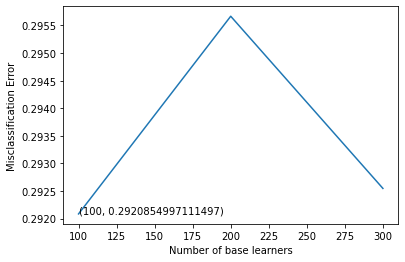

In [209]:
#Plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [210]:
#Training the best model and calculating the accuracy on the test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2461
           1       0.78      0.63      0.70       425

    accuracy                           0.92      2886
   macro avg       0.86      0.80      0.82      2886
weighted avg       0.91      0.92      0.92      2886

Accuracy of the model is :  0.918918918918919


[[2384   77]
 [ 157  268]]


<AxesSubplot:>

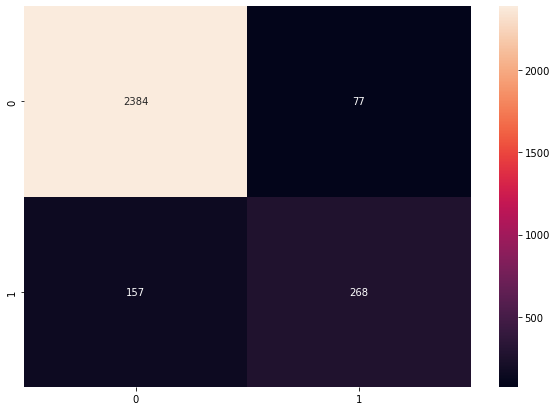

In [211]:
#Printting and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observations: 
* In this iteration, with the TfidfVectorizer the FN represents a 5% meanwhile the FP values represents just the 2.6%.
* True Negatives represents the 82.6% and the True positives TP represents the 9.2%.
* The Accuracy achieved was the 91.8%.

thank, jetblue, great, southwestair, unite, love, usairways, awesome, amaze, virginamerica, http, flight, best, nt, delay, good, appreciate, much, fly, make, get, rock, thx, hold, hours, cancel, crew, guy, airline, you, well, bag, please, wait, see, hour, like, help, service, customer, 
 
 


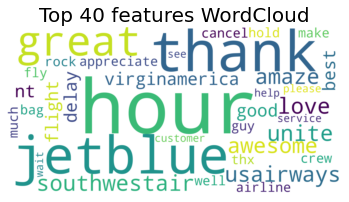

In [212]:
#Use to plot the 40 most important features as a wordcloud
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(25, 18), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

#### Observations: 
* The 40 words most important after processing with the TfidfVectorizer are:  thank, jetblue, great, southwestair, unite, love, usairways, awesome, amaze, virginamerica, http, flight, best, nt, delay, good, appreciate, much, fly, make, get, rock, thx, hold, hours, cancel, crew, guy, airline, you, well, bag, please, wait, see, hour, like, help, service, customer. 

## **Comparing the accuracies of Supervised Learning methods i.e Count Vectorizer and TF-IDF**

In [213]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,1


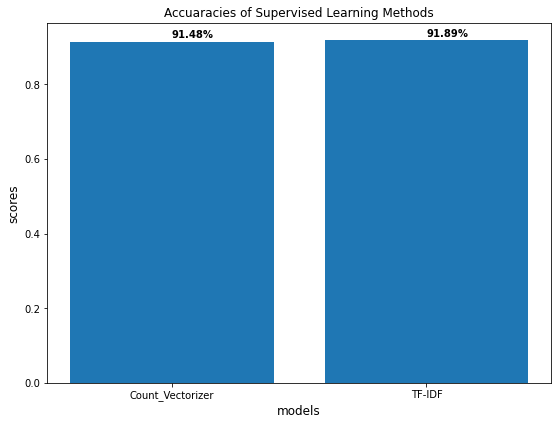

In [214]:
#Creating bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

#### Observations: 
* TF-IDF shows a slightly better performance than Count Vectorizer, the countvectorizer shows a 91.48% meanwhile the TFIdfvectorizer shows a 91.89%. The Tfi-df vectorizer not only focuses on the frequency of words present in the corpus but also provides the importance of the words. Through of the Tfi-df vectorizer  we can then remove the words that are less important for the analysis, hence making the model building less complex by reducing the input dimensions.

## Actionable Insights, Conclusions and Recommendations

* The dataset has 15 columns and 14640 rows.
* There were a total of 14640 non-null observations in all the columns "Tweetid", "airline_sentiment", "airline_sentiment_confidence", "airline", "name", "retweet_count", "text", "tweet_created" so we have not missing values values in these columns.
* The columns of the dataset are as follow: "tweet_id", "airline_sentiment", "airline_sentiment_confidence", "negativereason", "negativereason_confidence", "airline", "airline_sentiment_gold", "name", "negativereason_gold ", "retweet_count", "text", "tweet_coord ", "tweet_created", "tweet_location", and "user_timezone".
* From the 15 columns in the dataset: 11 were object type('airline_sentiment, 'negativereason', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone', 2 corresponded to an integer64 type ('tweetid' and 'retweet_count'), and 2 corresponded to float64 format('airline_sentiment_confidence' and 'negativereason_confidence').
* The total memory usage initially was 1.7+ MB. 
* We had 36 duplicated values in our dataset.
* We had a great percentage of null values in our dataset, including almost the 100% of the data in the columns 'airline_sentiment_gold', 'negativereason_gold', and 'tweet_coord'.
* Having a look on the first 10 rows of the dataset, the last 10, and extracting a 20 rows random sample, we could observe that we had to do some data cleansing process.
* Percental weights for the null values per column were as follows:
  * airline_sentiment_gold: this column has a 99.73% of Null values/NaN. 
  * negativereason_gold: this column has a 99.78% of Null values/NaN.
  * tweet_coord: the null values in this column represents the 93.04%.
  * negativereason: null values represents the 37.31%.
  * user_timezone: null values represents 32.92%.
  * tweet_location: this column has a 32.33% of null values/NaN.
  * negativereason_confidence: null values represents 28.13% in this column.
* We made some changes to our dataset, in order to improve the performance of our study. These are some of the remarkables changes:
  * We dropped 3 columns due to the great percental weight of the Null/NaN values('tweet_coord'(93.04%), 'airline_sentiment_gold'(99.73%), 'negativereason_gold'(99.78%)). 
  * We converted from object to category the columns 'airline_sentiment' and 'negativereason'.
  * We filled the NaN values in the 'negativereason_confidence' column with the median.
  * In the 'Negativereason' column we filled the NaN values with the term 'Unknown'.
  * After changing from object to category type the memory use decreased from 1.7+MB to 1.0+MB.
  * We dropped the samples with 'Neutral' mood in the column 'airline_sentiment'.
  * We ran the labelenconder over the processed dataset (tweets_enc).
* the largest number of tweets were created in two days. Between 2015-02-22 and 2015-02-23, with more than 6,000 tweets in that time frame.
* We suggest to find out if any anomalous event happened between that time period to correlate this peak and design a containment plan for events of similar origin in the future.
* 26.1% of the tweets in this dataset were related to the United Airlines company, thus occupying the first place in number of tweets with 3822 samples out 14460.
* The second place corresponded to the US Airways company, representing 19.9% with a total of 2913 samples out 14460.
* The third place corresponded to the American Airlines, representing 18.8% within the sample with a total of 2759 samples out 14460.
* The fourth place corresponded to the Southwest Airline company, representing the 16.5% within the sample with a total of 2420 samples out 14460.
* The fifth place corresponded to Delta Airline, representing 15.2% within the sample with a total of 2222 samples out 14460.
* The Virgin America Airline company was in the sixth place within this dataset, representing a 3.4% with a total of 504 samples out 14460.
* The Negatives tweets dominated evidently the dataset with a 62.7% with 9178 samples out 14460.
* The Neutral tweets represented the 21.2% with 3099 samples out 14460.
* The Positive tweets were a minority, representing just the 16.1% within the dataset with a total of 2363 samples out 14460.
* United Airlines had the highest number of negative tweets with 2633, 697 neutral tweets and 492 positive tweets.
* US Airways Airlines had the second highest number of negative tweets with 2263, with 381 neutral tweets and 269 positive tweets.
* American Airlines had the third highest number of negative tweets with 1960, with 463 neutral tweets and 336 positive tweets.
* Southwest Airlines had the fouth highest number of negative tweets with 1186, with 664 neutral tweets and 570 positive tweets.
* Delta Airlines had the fifth highest number of negative tweets with 955, with 723 neutral tweets and 544 positive tweets.
* Virgin American Airlines had the sixth highest number of negative tweets with 181, with 171 neutral tweets and 152 positive tweets.
* The negatives tweets dominated the dataset as we could infere from the graphs:
  * US Airways, United, and American Airlines had the poores ration between the Negatives, Neutrals and the Positive tweets. The mean of the sum of the neutrals and positive are under the 40% aproximately of the total.
  * Southwest and Delta had a moderate ratio between the Negatives, Neutrals and Positives tweets. The mean of the sum of neutrals and positive tweets were equals or slightly exceeded the negatives tweets.
  * Virgina America Airlines had the best ratio between the Negatives, Neutrals and Positives tweets. The number of the tweets belonging to each category were very close. The average of the sum of neutral and positive tweets markedly exceeded the negative ones. However, we must also take into account that it was the one with the fewest samples of the entire dataset.
* Summarizing some of the most important insights deducted from the previuos graphs:
  * Poor ratio companies: US Airways, American, and United Airlines
  * Moderate ratio: Delta and Southwest
  * Good Ratio: Virgin America
  * Highest number of samples within the dataset: United Airlines
  * Lowest number of samples within the dataset: Virgin America
  * Highest number of Negative Tweets: US Airways
  * Lowest number of Negative Tweets: Virgin America
  * Highest number of Neutrals Tweets: Delta Airlines
  * Lowest number of Neutrals Tweets: Virgin America Airlines
  * Highest number of Positive Tweets: Southwest Airlines
  * Lowest number of Positive Tweets: Virgin America Airlines
* After changing the NaN values within the datatset to 'Unknown', we could observe that it represented the 37.3% within this dataset.
* The second negative reason reported by the clients was a 'Customer sevice Issue' with the 19.9%.
* With a 11.4%, the third negative reason reported was 'Late Flight'.
* The fourth negative reason corresponded to 'Can't Tell' reason with the 8.1%.
* The fifth negative reason reported by the clients was 'Cancelled flight' with the 5.8%.
* The sixth negative reason reported by the clients was 'Lost Luggage' with the 4.9%.
* With a 4.0%, the seventh negative reason reported was 'Bad Flight'.
* With a 3.6%, the eighth negative reason reported was 'Flight Booking Problems'.
* The nineth negative reason reported by the clients was 'Flight Attendant Complaints' with the 3.3%.
* The tenth negative reason reported by the clients was 'Longlines' with the 1.2%.
* With a 0.5%, the eleventh negative reason reported was 'Damaged Luggage'.
* As we can see the 'Unknown' reason represented an important part of the dataset with almost 40% so in this regarding we should find a mechanism to make the clients provide a real reason. Maybe, we should create a reward program where they clients fill polls and receive discounts or tradeable points. Additionally, for further purposes we should validate if it is not a problem with the dataset.
* 'Unknown', 'Customer Service Issue', 'Late Flight', 'Can't Tell', and 'Cancelled Flight'represented the major issues for US Airways, United and American Airlines.
* Even though, 'Unknown', 'Customer Service Issue', 'Late Flight', 'Can't Tell', and 'Cancelled Flight'represented as well the major issues for Southwest, Delta and Virgin America, The number was notably lower and the distribution between each of the reported negative reasons was more homogeneous.
* The company with the best distribution and the fewest problems was Virgin America.
* The companies that had the greatest quantity and diversity of inconveniences were US Airways, United, and American. We recommend them to check their process continuosly.
* The distribution between positive tweets from 15 to 130 characters was fairly even. However, there is a clear increase in positive tweets from around 130 characters to around 150, where they drop off noticeably.
* For negative tweets, the distribution had a left skewness with the highest number of characters between approximately 100 and 140 characters, with an obvious anomaly between approximately 125 and 140 characters.
* Among the positive words that stand out the most before preprocessing are: Thank, Awesone, Aamazing, Love, Great, Customer Service, Help.
* Among the negatives words that stand out the most before preprocessing are: Cancelled Flightled, Late Flight, Delay, Call Ticket, Help.
* The Negative class dominated the sample with 79.5% while the positive class represented a 20.5% within the dataset after dropping the neutral sentiment tweets.
* After running the CountVectorizer we could see that both, the FN and the FP values represented the 4%.
* Running the CountVectorizer processing the True Negatives represented the 81% and the True positives TP represented the 10%.
* The Accuracy achieved was 91.47%.
* the 40 most important words obtained after the countVectorizer processing were: thank, jetblue, great, southwestair, unite, love, usairways, awesome, amaze, virginamerica, http, flight, best,nt ,delay, good, appreciate, much, fly, make, get, rock, thx, hold, hours, cancel, crew, guy, airline, you, well, bag, please, wait, see, hour, like, help, service,c ustomer.
* After running the TfidfVectorizer we could see that the FN represented 5% and the FP values just the 2.6%.
* With the TfidfVectorizer processing True Negatives represented the 82.6% and the True positives TP represented the 9.2%.
* The Accuracy achieved was 91.8%.
* the 40 most important words obtained after the TfidfVectorizer processing were: thank, jetblue, great, southwestair, unite, love, usairways, awesome, amaze, virginamerica, http, flight, best, nt, delay, good, appreciate, much, fly, make, get, rock, thx, hold, hours, cancel, crew, guy, airline, you, well, bag, please, wait, see, hour, like, help, service, customer.
* The TF-IDF showed a slightly better performance than the Count Vectorizer processing, the countvectorizer showed a 91.48% meanwhile the TFIdf vectorizer showed a 91.89% of Accuracy. The most important reason is that TFIdf vectorizer is not only focuses on the frequency of words present in the corpus but also provides the importance of the words. It can remove the words that are less important for the analysis, hence making the model building less complex by reducing the input dimensions.
* We recommend applying the Unsupervised processing of VADER and TextBlob to compare the results with the supervised processing performed in this study. Similarly, we suggest performing different iterations with different parameters to improve the metrics.
* It is suggested that all the Airlines review their customer interaction processes continuously, as negative sentiments towards most airlines predominate.
* It is recommended to carry out an award system for all those clients who express their opinion of the service through surveys or any other mechanism, in order to collect as much information as possible that allows the appropriate and effective design of campaigns focused on a service. of quality that promotes and improves the image and the feeling of the clients towards the airlines.
